<a href="https://colab.research.google.com/github/a-drew/banan.ai-mp1/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Starter Imports

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import *
import numpy as np
import logging

2. Pre-Analysis

['business', 'entertainment', 'politics', 'sport', 'tech']
[510, 386, 417, 511, 401]


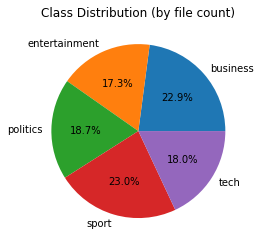

In [30]:
categories = sorted([file for file in os.listdir('data/BBC') if file != 'README.TXT'])
print(categories)
counts = [len([name for name in os.listdir('data/BBC/' + category)]) for category in categories]
print(counts)

plt.pie(counts, labels=categories, autopct='%1.1f%%')
plt.title('Class Distribution (by file count)')

plt.savefig('output/BBC-distribution.pdf')
plt.show()

3. Load the Dataset

In [31]:
dataset = skl.datasets.load_files('data/BBC', encoding="latin1")

print(dataset.keys())
print(dataset.target_names)
print(dataset.target[0:5])
print(dataset.filenames[0:5])
print(dataset.data[0:5])

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
['business', 'entertainment', 'politics', 'sport', 'tech']
[0 4 2 3 2]
['data/BBC/business/385.txt' 'data/BBC/tech/160.txt'
 'data/BBC/politics/090.txt' 'data/BBC/sport/074.txt'
 'data/BBC/politics/399.txt']
['Tate & Lyle boss bags top award\n\nTate & Lyle\'s chief executive has been named European Businessman of the Year by a leading business magazine.\n\nIain Ferguson was awarded the title by US publication Forbes for returning one of the UK\'s "venerable" manufacturers to the country\'s top 100 companies. The sugar group had been absent from the FTSE 100 for seven years until Mr Ferguson helped it return to growth. Tate\'s shares have leapt 55% this year, boosted by firming sugar prices and sales of its artificial sweeteners.\n\n"After years of a sagging stock price and a seven-year hiatus from the FTSE 100, one of Britain\'s venerable manufacturers has returned to the vaunted index," Forbes said. Mr Ferguson took t

4. Preprocess

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
x_word_counts = vec.fit_transform(dataset.data)
#print(x_word_counts)
#print(vec.get_feature_names_out())
print(vec.vocabulary_)

pd.DataFrame(data=x_word_counts.toarray(),columns=vec.get_feature_names_out())

{'tate': 26175, 'lyle': 16358, 'boss': 4394, 'bags': 3333, 'top': 26806, 'award': 3210, 'chief': 5741, 'executive': 10130, 'has': 12684, 'been': 3706, 'named': 18041, 'european': 9975, 'businessman': 4936, 'of': 18726, 'the': 26462, 'year': 29256, 'by': 4980, 'leading': 15662, 'business': 4934, 'magazine': 16451, 'iain': 13517, 'ferguson': 10626, 'was': 28521, 'awarded': 3211, 'title': 26718, 'us': 27901, 'publication': 21041, 'forbes': 11105, 'for': 11102, 'returning': 22395, 'one': 18837, 'uk': 27376, 'venerable': 28075, 'manufacturers': 16659, 'to': 26730, 'country': 7098, '100': 69, 'companies': 6390, 'sugar': 25641, 'group': 12306, 'had': 12452, 'absent': 1562, 'from': 11377, 'ftse': 11413, 'seven': 23748, 'years': 29260, 'until': 27796, 'mr': 17855, 'helped': 12893, 'it': 14557, 'return': 22393, 'growth': 12316, 'shares': 23852, 'have': 12726, 'leapt': 15690, '55': 1049, 'this': 26531, 'boosted': 4350, 'firming': 10845, 'prices': 20694, 'and': 2429, 'sales': 23062, 'its': 14571, 

,00,000,0001,000bn,000m,000s,000th,001,001and,001st,...,zooms,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


5. Split Training / Test Data

In [33]:
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(x_word_counts, dataset.target, train_size=0.8)

print(x_train)
print(y_train)

  (0, 12684)	2
  (0, 3706)	1
  (0, 18726)	8
  (0, 26462)	34
  (0, 29256)	1
  (0, 4980)	2
  (0, 28521)	2
  (0, 11102)	2
  (0, 26730)	5
  (0, 12452)	1
  (0, 11377)	1
  (0, 14557)	3
  (0, 12726)	1
  (0, 26531)	1
  (0, 2429)	14
  (0, 1957)	2
  (0, 23041)	4
  (0, 2994)	2
  (0, 13801)	4
  (0, 28749)	2
  (0, 2395)	2
  (0, 13846)	1
  (0, 14510)	3
  (0, 18832)	1
  (0, 28955)	1
  :	:
  (1779, 7970)	1
  (1779, 3215)	2
  (1779, 20561)	1
  (1779, 19825)	1
  (1779, 28197)	1
  (1779, 12070)	3
  (1779, 23765)	1
  (1779, 26565)	3
  (1779, 19491)	1
  (1779, 8261)	2
  (1779, 14276)	1
  (1779, 8264)	1
  (1779, 25816)	1
  (1779, 14167)	1
  (1779, 6292)	1
  (1779, 10836)	1
  (1779, 25787)	1
  (1779, 13991)	1
  (1779, 21458)	1
  (1779, 11589)	1
  (1779, 18036)	1
  (1779, 2965)	1
  (1779, 22192)	1
  (1779, 27727)	1
  (1779, 1618)	1
[3 3 4 ... 1 3 4]


6. Train Naive Bayes Classifier

In [34]:
nb = skl.naive_bayes.MultinomialNB()
#Train the model using the training sets
nb.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = nb.predict(x_test)

array([[-11.99032046,  -6.66731048, -11.99032046, ..., -11.99032046,
        -11.99032046, -11.99032046],
       [-11.76937999,  -7.12498909, -11.76937999, ..., -11.07623281,
        -11.76937999, -10.6707677 ],
       [-11.4013177 ,  -7.09051857, -11.4013177 , ..., -12.09446488,
        -12.09446488, -12.09446488],
       [-10.886215  ,  -8.76595147, -11.98482729, ..., -11.98482729,
        -10.37538938, -11.98482729],
       [-11.45682061,  -7.05621759, -12.14996779, ..., -12.14996779,
        -12.14996779, -12.14996779]])

7. Performance Metrics
 - [x] a clear separator (a sequence of hyphens or stars) and string clearly describing the model (e.g. “Multi- nomialNB default values, try 1”)
 - [x] the confusion matrix (you can use confusion matrix)
 - [x] the precision, recall, and F1-measure for each class (you can use classification report)
 - [x] the accuracy, macro-average F1 and weighted-average F1 of the model (you can use accuracy score and f1 score)
 - [x] the prior probability of each class
 - [x] the size of the vocabulary (i.e. the number of different words1)
 - [ ] the number of word-tokens in each class (i.e. the number of words in total2)
 - [ ] the number of word-tokens in the entire corpus
 - [ ] the number and percentage of words with a frequency of zero in each class
 - [ ] the number and percentage of words with a frequency of one in the entire corpus
 - [ ] your 2 favorite words (that are present in the vocabulary) and their log-prob

In [35]:
#counts_train = [np.count_nonzero(y_train == k) for k, v in enumerate(dataset.target_names)]
priors = { cat: np.count_nonzero(y_train == i)/len(y_train) for i, cat in enumerate(dataset.target_names) }

In [36]:
if os.path.exists('output/bbc-performance.txt'):
    os.remove('output/bbc-performance.txt')

logging.basicConfig(level=logging.INFO, format='%(message)s')
logger = logging.getLogger()
logger.addHandler(logging.FileHandler('output/bbc-performance.txt', 'w'))

In [37]:
nb_runs = 1 # try counter

def performance_report(test, pred):
    print = logger.info
    
    global nb_runs
    print('===================')
    print(' Naive Bayes Try ' + str(nb_runs))
    print('===================')
    nb_runs+=1

    print('\n(b) confusion_matrix:')
    print(skl.metrics.confusion_matrix(test, pred))
    print("\n(c/d) classification_report: ")
    print(skl.metrics.classification_report(test, pred, target_names=dataset.target_names))

    #print("\n(d) accuracy_score: ")
    #print(metrics.accuracy_score(test, pred))
    #print("\n(d) f1_score (macro avg): ")
    #print(metrics.f1_score(test, pred, average='macro'))
    #print("\n(d) f1_score (weighted avg): ")
    #print(metrics.f1_score(test, pred, average='weighted'))

    print("\n(e) prior probability of each class: ")
    print(priors)
    print("\n(f) vocabulary size: " + str(len(vec.get_feature_names_out())))
    #LEFT TODO:
    print("\n(g) word-tokens in each class: ")
    print("\n(h) word-tokens in the entire corpus: ")# + np.add.reduce(x_word_counts.toarray()))
    print("\n(i) the number and percentage of words with a frequency of zero in each class: ")
    print("\n(j) the number and percentage of words with a frequency of one in the entire corpus: ")
    print("\n(k) your 2 favorite words (that are present in the vocabulary) and their log-prob: ")
    # something with nb.feature_log_prob_ ? find word index, look up log-prob in feature_log_prob_, not sure what to do about the 5 diff rows

    print("\n")

performance_report(y_test, y_pred)

 Naive Bayes Try 1

(b) confusion_matrix:
[[ 95   0   2   0   2]
 [  0  78   1   0   2]
 [  0   0  84   0   0]
 [  0   0   0 101   0]
 [  0   0   1   0  79]]

(c/d) classification_report: 
               precision    recall  f1-score   support

     business       1.00      0.96      0.98        99
entertainment       1.00      0.96      0.98        81
     politics       0.95      1.00      0.98        84
        sport       1.00      1.00      1.00       101
         tech       0.95      0.99      0.97        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445


(e) prior probability of each class: 
{'business': 0.23089887640449439, 'entertainment': 0.17134831460674158, 'politics': 0.18707865168539325, 'sport': 0.2303370786516854, 'tech': 0.18033707865168538}

(f) vocabulary size: 29421

(g) word-tokens in each class: 

(h) word-tokens in the entire corpus: 

(i) the n

8. Naive Bayes, Try 2

In [38]:
nb2 = skl.naive_bayes.MultinomialNB()
nb2.fit(x_train, y_train)

performance_report(y_test, nb2.predict(x_test))

 Naive Bayes Try 2

(b) confusion_matrix:
[[ 95   0   2   0   2]
 [  0  78   1   0   2]
 [  0   0  84   0   0]
 [  0   0   0 101   0]
 [  0   0   1   0  79]]

(c/d) classification_report: 
               precision    recall  f1-score   support

     business       1.00      0.96      0.98        99
entertainment       1.00      0.96      0.98        81
     politics       0.95      1.00      0.98        84
        sport       1.00      1.00      1.00       101
         tech       0.95      0.99      0.97        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445


(e) prior probability of each class: 
{'business': 0.23089887640449439, 'entertainment': 0.17134831460674158, 'politics': 0.18707865168539325, 'sport': 0.2303370786516854, 'tech': 0.18033707865168538}

(f) vocabulary size: 29421

(g) word-tokens in each class: 

(h) word-tokens in the entire corpus: 

(i) the n

9. Naive Bayes, Try 3

In [39]:
nb3 = skl.naive_bayes.MultinomialNB(alpha=0.0001)
nb3.fit(x_train, y_train)

performance_report(y_test, nb3.predict(x_test))

 Naive Bayes Try 3

(b) confusion_matrix:
[[ 94   0   2   0   3]
 [  0  79   1   0   1]
 [  0   1  83   0   0]
 [  0   0   0 101   0]
 [  0   0   1   0  79]]

(c/d) classification_report: 
               precision    recall  f1-score   support

     business       1.00      0.95      0.97        99
entertainment       0.99      0.98      0.98        81
     politics       0.95      0.99      0.97        84
        sport       1.00      1.00      1.00       101
         tech       0.95      0.99      0.97        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445


(e) prior probability of each class: 
{'business': 0.23089887640449439, 'entertainment': 0.17134831460674158, 'politics': 0.18707865168539325, 'sport': 0.2303370786516854, 'tech': 0.18033707865168538}

(f) vocabulary size: 29421

(g) word-tokens in each class: 

(h) word-tokens in the entire corpus: 

(i) the n

10. Naive Bayes, Try 4

In [40]:
nb4 = skl.naive_bayes.MultinomialNB(alpha=0.9)
nb4.fit(x_train, y_train)

performance_report(y_test, nb4.predict(x_test))

nb_runs = 1 # reset try count

 Naive Bayes Try 4

(b) confusion_matrix:
[[ 95   0   2   0   2]
 [  0  78   1   0   2]
 [  0   0  84   0   0]
 [  0   0   0 101   0]
 [  0   0   1   0  79]]

(c/d) classification_report: 
               precision    recall  f1-score   support

     business       1.00      0.96      0.98        99
entertainment       1.00      0.96      0.98        81
     politics       0.95      1.00      0.98        84
        sport       1.00      1.00      1.00       101
         tech       0.95      0.99      0.97        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445


(e) prior probability of each class: 
{'business': 0.23089887640449439, 'entertainment': 0.17134831460674158, 'politics': 0.18707865168539325, 'sport': 0.2303370786516854, 'tech': 0.18033707865168538}

(f) vocabulary size: 29421

(g) word-tokens in each class: 

(h) word-tokens in the entire corpus: 

(i) the n

11. TODO: Write BBC-discussions.txt